/home/pau/PhD/1D-Variational-RBM/python/wavefunction.py:123: SyntaxWarning: invalid escape sequence '\l'
  """


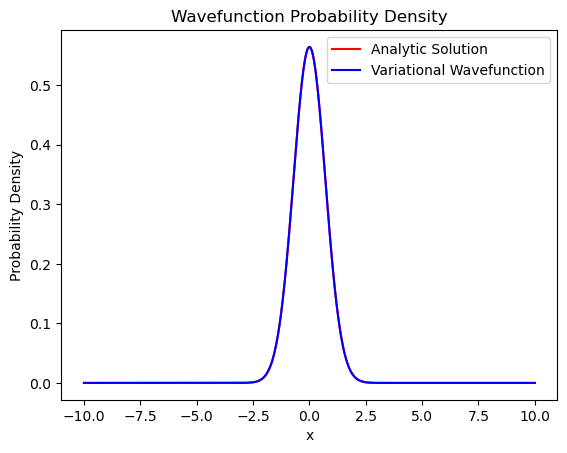

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wavefunction import Wavefunction, variational_optimization

wf = Wavefunction(L=0.5, b=0., c = [0.+1j,0.], w = [0.,0.])
x = np.linspace(-10, 10, 10000)
wf.compute(x)
wf.plot()

In [2]:
Nh = 10
# complex
c_init_real = np.random.normal(loc= 0., scale=0.01, size = Nh)
c_init_imag = np.random.normal(loc= 0., scale=0.01, size = Nh)
w_init_real = np.random.normal(loc= 0., scale=0.01, size = Nh)
w_init_imag = np.random.normal(loc= 0., scale=0.01, size = Nh)

params = {
    "Nh": Nh,
    "b": 0.,
    "c_re": c_init_real,
    "c_im": c_init_imag,
    "w_re": w_init_real,
    "w_im": w_init_imag,
    # "lagrange": 1.,
}
result = variational_optimization(params)

[ 0.         -0.00524998 -0.00212074  0.00444696 -0.01616434 -0.00266593
  0.0083555  -0.00134315  0.01920846 -0.00123291 -0.00885269  0.0007322
  0.00952288  0.00906785 -0.00437518  0.00248728  0.00898524 -0.00417953
  0.01245375  0.00110777  0.01231333  0.01903179 -0.0197981  -0.00239212
  0.001511   -0.01257275 -0.0187489  -0.00377259 -0.00576243 -0.00225499
 -0.01007332  0.02603002  0.01031341  0.00554253 -0.0118454  -0.00061475
  0.00238871  0.03075255  0.01249227 -0.02258506 -0.00672219]


In [4]:
result

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 0.4999874811213291
                          x: [ 5.509e-04 -1.625e-02 ...  7.790e-04
                               0.000e+00]
                        nit: 100
      minimization_failures: 100
                       nfev: 48415
                       njev: 2105
 lowest_optimization_result:  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
                              success: True
                               status: 0
                                  fun: 0.4999874811213291
                                    x: [ 5.509e-04 -1.625e-02 ...
                                         7.790e-04  0.000e+00]
                                  nit: 3
                                  jac: [-5.551e-09  1.110e-08 ...
                                         1.665e-08  1.000e+00]
                                 nfev: 115
 

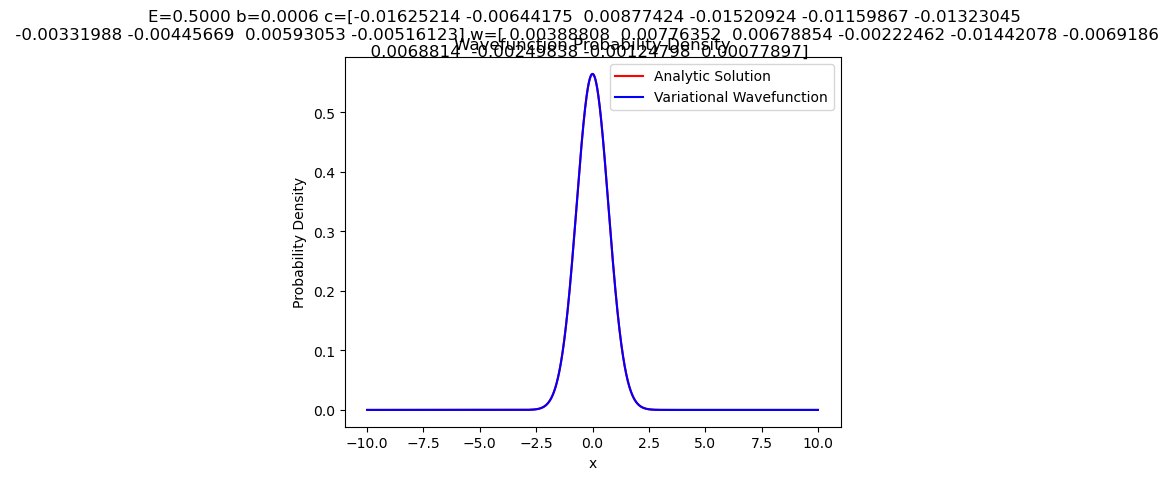

In [5]:
b = result.x[0]
c = result.x[1:Nh+1]
w = result.x[Nh+1:2*Nh+1]
wf = Wavefunction(L=0.5, b=b, c=c, w=w)
x = np.linspace(-10, 10, 10000)
wf.compute(x)
plt.figure()
plt.suptitle(f"E={wf.total_energy():.4f} b={b:.4f} c={c} w={w}")
wf.plot(analytic=True)


In [6]:
print("b=", b)
print("c=", c)
print("w=", w)


b= 0.02151188171934994
c= [ 0.07994467 -0.02263498]
w= [-0.02261462 -0.01972704]


In [7]:
wf2=Wavefunction(L=0.5, b=b, c=c, w=w)
x = np.linspace(-10, 10, 10000)

prod = 1.
for i in range(Nh):
    prod *= 1+np.exp(c[i]+x*w[i])
print(prod)

from scipy.integrate import trapezoid
integral = trapezoid(prod, x)
print("integral=", integral)
print("normalization=", 1./integral**2)


[5.16616636 5.16592098 5.16567562 ... 3.3602659  3.36013641 3.36000693]
integral= 83.34735124392326
normalization= 0.00014395156632224517


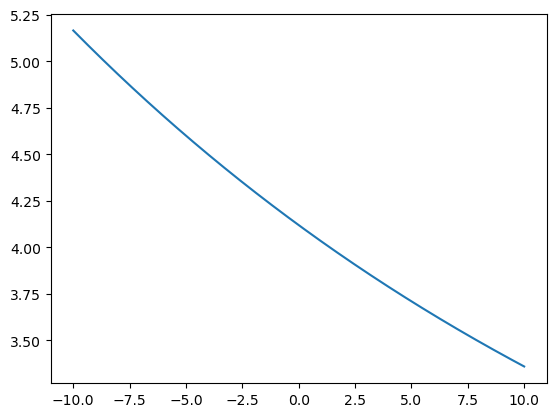

In [8]:
plt.plot(x, prod)

In [9]:
wf_overlap = Wavefunction(L=0.5, b=0.0, c=[0.,0.], w=[0.,0.])
wf_overlap.compute(x)
wf_overlap.GS_overlap()

1.0

Text(0, 0.5, 'exp(x*sum(w))')

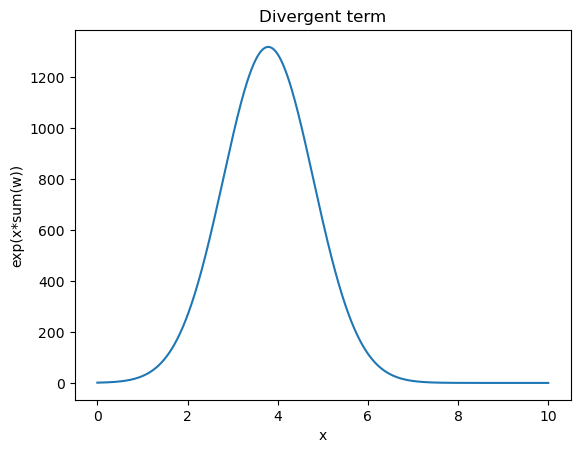

In [64]:
x_test_divergence = np.linspace(0, 10, 10000)

Nh=20

w_divergence = np.random.uniform(-1, 1, Nh)

divergent_term = np.exp(x_test_divergence*sum(w_divergence))
gaussian = np.exp(-x_test_divergence**2/2)
plt.figure()
# plt.plot(x_test_divergence, divergent_term)
plt.plot(x_test_divergence, gaussian*divergent_term)
plt.title("Divergent term")
plt.xlabel("x")
plt.ylabel("exp(x*sum(w))")
# plt.semilogy()